In [163]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
import uuid
import pandas_bokeh
pandas_bokeh.output_notebook()
import bokeh as bk
from bokeh.plotting import figure, show
import bokeh.models as bkm
import bokeh.plotting as bkp
import bokeh.layouts as bkl
from bokeh.resources import CDN
from bokeh.embed import file_html

import seaborn as sns
import py_sleuth as pys
import os

def add_subplot_label(idx, subplot, start_character, **kwargs):
    """
    Adds A B C ... to upper left corner of a subplot...
    """
    offset = kwargs.pop("offset", (0,0))
    fontsize = kwargs.pop("fontsize", 12)
    label = kwargs.pop("label", None)

    subplot_label = chr(ord(start_character)+idx) if label is None else label
    xoff, yoff = offset

    subplot.annotate(
                xy = (-0.1+xoff,1.03+yoff), 
                text = subplot_label, 
                xycoords = "axes fraction",
                weight = "bold", 
                fontsize = fontsize
            )


Loading BokehJS ...

In [ ]:
# # this cell may take some minutes to run! (if lazy loading was not possible...)

# # setup analysis for A549 (we will look at KD vs CTR)

# # setup sleuth data
# a549 = pys.SleuthResults("../data/sleuth_results/A549")
# a549.setup("../data/index.csv", subset = "cell_line == 'A549'")

# # setup auxiliary DESeq2 Data
# a549_de = pys.DESeq2Results("../data/deseq_results/A549", name = "DE_A549")
# a549_de.setup("../data/index.csv", subset = "cell_line == 'A549'")
# a549_de.import_gene_labels(a549)
# # setup analysis for H358 (we will look at KD vs CTR)

# # setup sleuth data
# h358 = pys.SleuthResults("../data/sleuth_results/H358")
# h358.setup("../data/index.csv", subset = "cell_line == 'H358'")

# # setup auxiliary DESeq2 Data
# h358_de = pys.DESeq2Results("../data/deseq_results/H358", name = "DE_H358")
# h358_de.setup("../data/index.csv", subset = "cell_line == 'H358'")
# h358_de.import_gene_labels(h358)

# # setup analysis for H358 (we will look at KD vs CTR)

# # setup sleuth data
# h838 = pys.SleuthResults("../data/sleuth_results/H838")
# h838.setup("../data/index.csv", subset = "cell_line == 'H838'")

# # setup auxiliary DESeq2 Data
# h838_de = pys.DESeq2Results("../data/deseq_results/H838", name = "DE_H838")
# h838_de.setup("../data/index.csv", subset = "cell_line == 'H838'")
# h838_de.import_gene_labels(h838)

In [ ]:
# fig, axs = plt.subplots(1,3, figsize = (13, 3))

# condition = "conditionKD"
# sleuths = [a549, h358, h838]
# #
# q = "abs(b * neg_log10qval_wt) > 80 & abs(b) > 1 & qval < 0.05"

# # store the subsetted data (colored red and blue) in a dict (later export to tables...)
# signif_data = {}

# idx = 0
# for sleuth, ax in zip(sleuths, axs):
    
#     res = sleuth.volcano(
#                             condition, 
#                             signif_query = q, 
#                             ax = ax, 
#                             alpha_shift = 2, # shift alphas by factor x2 (more intense)
#                             highlight_genes = ["LDHB"], 
#                             highlight_color = "black", 
#                             color_by_gene = False,
#                             filter_gene_transcripts = False,
#                         )

#     # store query data
#     res = res[1] #0 would be for the highlight genes
#     signif_data.update({sleuth.name : (sleuth,res)})

#     ax.set(title = sleuth.name, xlabel = "", ylabel = "")
#     # ax.legend(frameon=True, bbox_to_anchor=(1.4,1), loc = "upper right").remove()
#     add_subplot_label(idx, ax, "A", fontsize = 15, offset = (-0.15, 0))
#     idx += 1

# axs[0].set(ylabel = "$-log_{10}(qval)$")
# axs[int(len(axs)/2)].set(xlabel = r"$\beta$ Value")
# for i in axs: i.legend().remove()
# axs[-1].legend(frameon=True, bbox_to_anchor=(1.4,1), loc = "upper right", title = "Highlighted", handles = [Line2D([0], [0], marker = "o", lw = 0, color = "black", label = "LDHB")])  
# plt.tight_layout()
# plt.savefig(fname = "Plots/volcano_plots.pdf", bbox_inches = "tight")

In [ ]:
# # export query data to csv files
# for name, data in signif_data.items():
#     sleuth, df = data
#     save_loc = os.path.join(sleuth.directory, f"{name}_final.csv")
#     df.to_csv(save_loc, index = False)

In [ ]:
# res = sleuth.volcano(
#                         condition, 
#                         signif_query = q, 
#                         ax = ax, 
#                         alpha_shift = 2, # shift alphas by factor x2 (more intense)
#                         highlight_genes = ["LDHB"], 
#                         highlight_color = "black", 
#                         color_by_gene = False,
#                         filter_gene_transcripts = False,
#                         mode = "interactive"
#                     )


In [ ]:
# a549.link_deseq(a549_de)
# a549.crossref_deseq({"conditionKD" : "condition_KD_vs_CTR"})
# a549.volcano("conditionKD", alpha_shift = 0.6)

In [ ]:
# df = a549.get_wt("conditionKD")
# df["is_lncRNA"] = df["target_id"].str.contains("lncRNA")
# df

In [ ]:
# # find lncRNAs

# df = a549.get_wt("conditionKD")
# df["is_lncRNA"] = df["target_id"].str.contains("lncRNA")

# to_highlight = list(df.query("is_lncRNA == True")["ext_gene"])
# to_highlight = [i for i in to_highlight if i == i] # remove NaN

# # static
# r = a549.volcano("conditionKD", qval_threshold = 0.001, src = df, crossref = False, alpha_shift = 0.3, highlight_genes = to_highlight)
# # interactive
# r = a549.volcano("conditionKD", mode = "interactive", qval_threshold = 0.01, src = df, signif_query = f"ext_gene in {to_highlight}")

In [5]:
def read_data_all(directory):
    """
    Returns two dataframes, one for sleuth (first) and one for corresponding deseq (second) results
    """
    a_de = pd.read_csv(f"../data/deseq_results/{directory}/all.csv")
    a_de = a_de.rename(columns = {"Unnamed: 0" : "transcript_id"})
    a_so = pd.read_csv(f"../data/sleuth_results/{directory}/{directory}_transcript_level.csv")
    a_so["transcript_id"] = a_so["target_id"].apply(lambda x: x.split("|")[0])
    a_de["log10padj"] = a_de["padj"].apply(lambda x: -np.log10(x))
    return a_so, a_de

In [ ]:
# a_so, a_de = read_data_all(directory = "A549")
# novels = a_de[~ a_de["transcript_id"].str.contains("ENST")]

# fig, ax = plt.subplots()
# a_de.plot.scatter(x = "log2FoldChange", y = "log10padj", ax = ax, color = "gray", alpha = 0.2)
# novels.plot.scatter(x = "log2FoldChange", y = "log10padj", ax = ax, color = "crimson", alpha = 0.5)


In [ ]:
# a_so, a_de = read_data_all(directory = "H358")
# novels = a_de[~ a_de["transcript_id"].str.contains("ENST")]


# fig, ax = plt.subplots()
# a_de.plot.scatter(x = "log2FoldChange", y = "log10padj", ax = ax, color = "gray", alpha = 0.2)
# novels.plot.scatter(x = "log2FoldChange", y = "log10padj", ax = ax, color = "crimson", alpha = 0.5)


In [ ]:
# a_so, a_de = read_data_all(directory = "H838")
# novels = a_de[~ a_de["transcript_id"].str.contains("ENST")]


# fig, ax = plt.subplots()
# a_de.plot.scatter(x = "log2FoldChange", y = "log10padj", ax = ax, color = "gray", alpha = 0.2)
# novels.plot.scatter(x = "log2FoldChange", y = "log10padj", ax = ax, color = "crimson", alpha = 0.5)


### Here starts the actual results producing analysis 
----------------------------------------------------------------

In [152]:
def read_data(cell_line, condition):
    """
    Returns two dataframes, one for sleuth (first) and one for corresponding deseq (second) results
    """
    a_de = pd.read_csv(f"../data/deseq_results/{cell_line}/condition_{condition}_vs_CTR.csv")
    a_de = a_de.rename(columns = {"Unnamed: 0" : "transcript_id"})
    a_so = pd.read_csv(f"../data/sleuth_results/{cell_line}/{cell_line}_wt_condition{condition}_transcript.csv")
    
    a_so["transcript_id"] = a_so["target_id"].apply(lambda x: x.split("|")[0])
    a_de = a_de.merge(a_so[["transcript_id", "ext_gene"]], on = "transcript_id")
    
    a_de["log10padj"] = a_de["padj"].apply(lambda x: -np.log10(x))
    a_so["log10qval"] = a_so["qval"].apply(lambda x: -np.log10(x))
    
    a_so["also_deseq"] = a_so["transcript_id"].isin(set(a_de["transcript_id"]))
    a_de["also_sleuth"] = a_de["transcript_id"].isin(set(a_so["transcript_id"]))

    
    return a_so, a_de

In [165]:
def ivolcano(so, de, main = "so", pthreshold = 0.01, fcthreshold = 1, title = ""):
    """
    Makes an interactive bokeh volcano plot
    """
    
    # cross-ref all data and unpack 
    all_data, all_params = crossref(so, de, main, pthreshold, fcthreshold)
    background, signif_DE, also_other, also_other_DE, both_DE = all_data
    x,y,xlabel,ylabel = all_params

    # make figure
    fig = bkp.figure(title=title)
    fig.add_layout(bkm.Title(text=xlabel, align="center"), "below")
    fig.add_layout(bkm.Title(text=ylabel, align="center"), "left")
    
    # background
    source = bkm.ColumnDataSource(data=background, id = str(uuid.uuid1()))
    background_glyph = bkm.Circle(x=x, y=y, fill_alpha = 0.1, line_alpha = 0.08 )
    background_render = fig.add_glyph(source_or_glyph=source, glyph=background_glyph)

    # also other
    source = bkm.ColumnDataSource(data=also_other, id = str(uuid.uuid1()))
    also_other_glyph = bkm.Circle(x=x, y=y, fill_color = "blue", fill_alpha = 0.4, line_alpha = 0.1)
    also_other_render = fig.add_glyph(source_or_glyph=source, glyph=also_other_glyph)

    # signifs
    source = bkm.ColumnDataSource(data=signif_DE, id = str(uuid.uuid1()))
    signifs_glyph = bkm.Circle(x=x, y=y, fill_color = "red",  fill_alpha = 0.4, line_alpha = 0.1)
    signifs_render = fig.add_glyph(source_or_glyph=source, glyph=signifs_glyph)
    signifs_hover = bkm.HoverTool(renderers=[signifs_render],
                            tooltips=[('id', '@transcript_id'), ('name', '@ext_gene')])
    fig.add_tools(signifs_hover)

    # signifs also found by other (not implying that other also agrees on DE)
    source = bkm.ColumnDataSource(data=also_other_DE, id = str(uuid.uuid1()))
    also_other_DE_glyph = bkm.Circle(x=x, y=y, fill_color = "purple",  fill_alpha = 0.6, line_alpha = 0.5)
    also_other_DE_render = fig.add_glyph(source_or_glyph=source, glyph=also_other_DE_glyph)

    # found by both methods as DE
    source = bkm.ColumnDataSource(data=both_DE, id = str(uuid.uuid1()))
    both_DE_glyph = bkm.Circle(x=x, y=y, fill_color = "lawngreen",  fill_alpha = 0.8, line_alpha = 0.5)
    both_DE_render = fig.add_glyph(source_or_glyph=source, glyph=both_DE_glyph)

    return fig

def crossref(so, de, main, pthreshold, fcthreshold):
    """
    Cross-references sleuth and deseq datasets and returns subsets alonside with plotting parameters
    main specifies which of the two datasets will be the one providing the plotting data and axes...
    main = "so" | "de"
    """
    
    background = so if main == "so" else de
    other = de if main == "so" else so 
    other_label = "de" if main == "so" else "so"

    xvals = {
        "so" : "b",
        "de" : "log2FoldChange"
    }

    yvals = {
        "so" : "log10qval",
        "de" : "log10padj"
    }

    pvals = {
        "so" : "qval",
        "de" : "padj"
    }

    other_col = {
        "so" : "also_deseq",
        "de" : "also_sleuth"
    }

    xlabels = {
        "so" : "𝛽-value",
        "de" : "log2(Fold-Change)"
    }

    ylabels = {
        "so" : "-log10(q-value)",
        "de" : "-log10(adj. p-value)"
    }

    x, y, p, ocol = xvals[main], yvals[main], pvals[main], other_col[main]
    ox, op = xvals[other_label], pvals[other_label]

    xlabel, ylabel = xlabels[main], ylabels[main]

    # prepare data - Cross-Referencing
    also_other = background.query(f"{ocol} == True")
    signif_DE = background.query(f"{p} < {pthreshold} & abs({x}) > {fcthreshold}")
    also_other_DE = background.query(f"{p} < {pthreshold} & abs({x}) > 1 & {ocol} == True")
    both_DE = list(also_other_DE["transcript_id"])
    both_DE = other.query(f"transcript_id in {both_DE} & abs({ox}) > {fcthreshold} & {op} < {pthreshold}")
    both_DE = list(both_DE["transcript_id"])
    both_DE = also_other_DE.query(f"transcript_id in {both_DE}")
    
    all_data = (background, signif_DE, also_other, also_other_DE, both_DE)
    all_params = (x,y,xlabel,ylabel)
    return all_data, all_params


In [166]:
# read the data
a549_so, a549_de = read_data("A549", "KD")
h358_so, h358_de = read_data("H358", "KD")
h838_so, h838_de = read_data("H838", "KD")

des_de = [a549_de, h358_de, h838_de]
des_so = [a549_so, h358_so, h838_so]
names = ["A549", "H358", "H838"]


# we set as FDR threshold 0.01 and for fold change 1 (at least double)
# --------------------------------------------------------------------
pthreshold = 0.01 
fcthreshold = 1 
# --------------------------------------------------------------------


In [208]:
# --------------------------------------------------------------------
#  Here we generate a set of interactive volcano plots
# --------------------------------------------------------------------

# note that due to the way bokeh references data it is not possible to use loops to generate a grid figure
# including all volcano plots. Hence, each plot has to be stored separately..
settings = dict(
    A549_sleuth = dict(so = a549_so, de = a549_de, main = "so"),
    H358_sleuth = dict(so = h358_so, de = h358_de, main = "so"),
    H838_sleuth = dict(so = h838_so, de = h838_de, main = "so"),
    A549_deseq = dict(so = a549_so, de = a549_de, main = "de"),
    H358_deseq = dict(so = h358_so, de = h358_de, main = "de"),
    H838_deseq = dict(so = h838_so, de = h838_de, main = "de"),
)

for name, setting in settings.items():
    f = ivolcano(**setting)
    bkp.output_file(f"interactive_volcano_{name}.html", title = f"{name}", mode='inline')
    bkp.save(f)

In [ ]:
# --------------------------------------------------------------------
#  Here we generate a set of interactive volcano plots for NTC and KO of A549 
#  (that's all we will do about these two)
# --------------------------------------------------------------------

ko = pd.read_csv("../data/sleuth_results/A549/A549_wt_conditionKO_transcript.csv")
ntc = pd.read_csv("../data/sleuth_results/A549/A549_wt_conditionNTC_transcript.csv")

ko["transcript_id"] = ko["target_id"].apply(lambda x: x.split("|")[0])
ko["log10qval"] = ko["qval"].apply(lambda x: -np.log10(x))

ntc["transcript_id"] = ntc["target_id"].apply(lambda x: x.split("|")[0])
ntc["log10qval"] = ntc["qval"].apply(lambda x: -np.log10(x))

signif_ko = ko.query(f"qval < {pthreshold} & abs(b) > {fcthreshold}")
signif_ntc = ntc.query(f"qval < {pthreshold} & abs(b) > {fcthreshold}")


x, y = "b", "log10qval"
xlabel, ylabel = "𝛽-value", "-log10(q-value)"
for i, j, name in zip([ko, ntc], [signif_ko, signif_ntc], ["A549_KO", "A549_NTC"]):
    # make figure
    fig = bkp.figure()
    fig.add_layout(bkm.Title(text=xlabel, align="center"), "below")
    fig.add_layout(bkm.Title(text=ylabel, align="center"), "left")
    
    # background
    source = bkm.ColumnDataSource(data=i, id = str(uuid.uuid1()))
    background_glyph = bkm.Circle(x=x, y=y, fill_alpha = 0.1, line_alpha = 0.08 )
    background_render = fig.add_glyph(source_or_glyph=source, glyph=background_glyph)

    # signifs
    source = bkm.ColumnDataSource(data=j, id = str(uuid.uuid1()))
    signifs_glyph = bkm.Circle(x=x, y=y, fill_color = "red",  fill_alpha = 0.4, line_alpha = 0.1)
    signifs_render = fig.add_glyph(source_or_glyph=source, glyph=signifs_glyph)
    signifs_hover = bkm.HoverTool(renderers=[signifs_render],
                            tooltips=[('id', '@transcript_id'), ('name', '@ext_gene')])
    fig.add_tools(signifs_hover)

    bkp.output_file(f"interactive_volcano_{name}.html", title = f"{name}", mode='inline')
    bkp.save(fig)


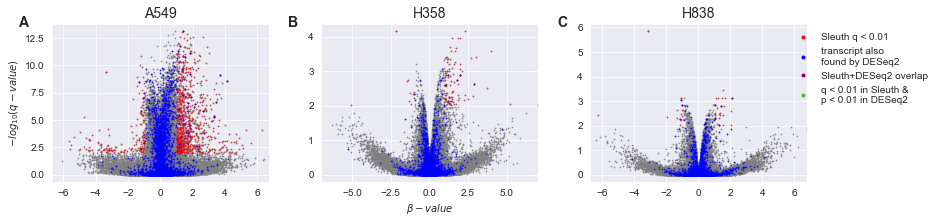

In [58]:
# --------------------------------------------------------------------
# Here we setup a volcano plot figure for sleuth results 
# --------------------------------------------------------------------

fig, axs = plt.subplots(1,3, figsize = (13, 3.2))


idx = 0
for so, de, name in zip(des_so, des_de, names):
    
    # cross-ref all data and unpack 
    all_data, all_params = crossref(so, de, "so", pthreshold, fcthreshold)
    background, signif_DE, also_other, also_other_DE, both_DE = all_data
    x,y,xlabel,ylabel = all_params

    # main background
    axs[idx].scatter(data = background, x = x, y = y, s = 0.6, c = "gray", alpha = 0.8)
    
    # all transcripts that were also found by DESEQ2
    axs[idx].scatter(data = also_other, x = x, y = y, s = 0.7, c = "blue", alpha = 0.6)

    # all transcripts from sleuth we would classify as significantly differentially expressed
    axs[idx].scatter(data = signif_DE, x = x, y = y, s = 0.7, c = "red", alpha = 0.3)

    # all those DE that are also found by DESEQ2 (just found in general)
    axs[idx].scatter(data = also_other_DE, x = x, y = y, s = 0.7, c = "purple", alpha = 0.9)

    # all those that sleuth and deseq think are DE
    axs[idx].scatter(data = both_DE, x = x, y = y, s = 0.8, c = "limegreen", alpha = 0.9)

    
    axs[idx].set_title(name, fontsize = 14)
    axs[idx].set(xlim = (-max(background[x]),max(background[x])))

    add_subplot_label(idx, axs[idx], "A", fontsize = 14, offset = (-0.05,-0.05))
    idx += 1

axs[0].set(ylabel = "$-log_{10}(q-value)$")
axs[1].set(xlabel = "$\\beta-value$")
axs[2].legend(
handles = [
        Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "red", label = f"Sleuth q < {pthreshold}"),
        Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "blue", label = f"transcript also\nfound by DESeq2"),
        Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "purple", label = f"Sleuth+DESeq2 overlap"),
        Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "limegreen", label = f"q < {pthreshold} in Sleuth &\np < {pthreshold} in DESeq2"),

],
loc = "upper right", bbox_to_anchor = (1.6, 1), facecolor = "white", frameon = False
    
)

plt.tight_layout(w_pad=2)
sns.set_style("darkgrid")

In [ ]:
# save all differentially expressed subsets (transcript level)
# and also novel transcripts (that are differentially expressed)
# as well as lncRNAs

# DE transcripts 

# deseq
for i, name in zip(
    des_de, 
    names
):
    tmp = i.query(f"padj < {pthreshold} & abs(log2FoldChange) > 1")
    tmp.to_csv(f"DE/deseq_{name}_de.csv")

# sleuth
for i, name in zip(
    des_so, 
    names
):
    tmp = i.query(f"qval < {pthreshold} & abs(b) > 1")
    tmp.to_csv(f"DE/sleuth_{name}_de.csv")

# novel
for i, name in zip(
    des_de, 
    names
):
    tmp = i.query(f"padj < {pthreshold} & abs(log2FoldChange) > 1 ")
    tmp = tmp[~tmp["transcript_id"].str.contains("ENS")]
    tmp.to_csv(f"DE/deseq_novel_{name}_de.csv")

# lncRNAs

# sleuth + deseq (deseq requires to get the ids from sleuth as deseq does not have the large target_id column from sleuth)
for i, j, name in zip(
    des_so, des_de,
    names
):
    # we'll merge the target_column from sleuth to deseq so that we can also search for lncRNA in deseq directly..
    tmp = i.query(f"qval < {pthreshold} & abs(b) > 1")
    tmp = tmp[tmp["target_id"].str.contains("lncRNA")]
    tmp.to_csv(f"DE/sleuth_lncrna_{name}_de.csv")

    # merge target_id to deseq
    ids = i[["transcript_id", "target_id"]]
    tmp2 = j.merge(ids, on = "transcript_id")
    
    tmp2 = tmp2[tmp2["target_id"].str.contains("lncRNA")]
    tmp2 = tmp2.query(f"padj < {pthreshold} & abs(log2FoldChange) > 1")

    tmp2.to_csv(f"DE/deseq_lncrna_{name}_de.csv")


In [61]:
# --------------------------------------------------------------------
# Here we setup a volcano plot figure for deseq results 
# --------------------------------------------------------------------

fig, axs = plt.subplots(1,3, figsize = (13, 3.2))

idx = 0
for so, de, name in zip(des_so, des_de, names):
    
    # cross-ref all data and unpack 
    all_data, all_params = crossref(so, de, "de", pthreshold, fcthreshold)
    background, signif_DE, also_other, also_other_DE, both_DE = all_data
    x,y,xlabel,ylabel = all_params

    # main background
    axs[idx].scatter(data = background, x = x, y = y, s = 0.6, c = "gray", alpha = 0.8)
    
    # all transcripts that were also found by DESEQ2
    axs[idx].scatter(data = also_other, x = x, y = y, s = 0.7, c = "blue", alpha = 0.6)

    # all transcripts from sleuth we would classify as significantly differentially expressed
    axs[idx].scatter(data = signif_DE, x = x, y = y, s = 0.7, c = "red", alpha = 0.3)

    # all those DE that are also found by DESEQ2 (just found in general)
    axs[idx].scatter(data = also_other_DE, x = x, y = y, s = 0.7, c = "purple", alpha = 0.9)

    # all those that sleuth and deseq think are DE
    axs[idx].scatter(data = both_DE, x = x, y = y, s = 0.8, c = "limegreen", alpha = 0.9)

    
    axs[idx].set_title(name, fontsize = 14)
    axs[idx].set(xlim = (-max(background[x]),max(background[x])))

    add_subplot_label(idx, axs[idx], "A", fontsize = 14, offset = (-0.05,-0.05))
    idx += 1

axs[0].set(ylabel = "$-log_{10}(adjusted \ p-value)$")
axs[1].set(xlabel = "$log_2(Fold-Change)$")
axs[2].legend(
handles = [
        Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "red", label = f"DESeq2 padj < {qthreshold}"),
        Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "blue", label = f"transcript also\nfound by Sleuth"),
        Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "purple", label = f"Sleuth+DESeq2 overlap"),
        Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "limegreen", label = f"q < {pthreshold} in Sleuth &\np < {pthreshold} in DESeq2"),

],
loc = "upper right", bbox_to_anchor = (1.6, 1), facecolor = "white", frameon = False
    
)

plt.tight_layout(w_pad=2)
sns.set_style("darkgrid")


In [ ]:
# look for lncRNAs
# this figure plots above all lncRNAs (yellow) and thos found differentially expressed by sleuth alone
# below then the ones that are also found differentially expressed by deseq
fig, axs = plt.subplots(1,3, figsize = (13, 2.3))

idx = 0
for i, j, name in zip(des_so, des_de, names):

    lncRNAs = i[i["target_id"].str.contains("lncRNA")]

    axs[idx].scatter(data = i, x = "b", y = "log10qval", s = 0.5, c = "gray", alpha = 0.2)
    
    # all lncRNAs (from sleuth)
    axs[idx].scatter(data = lncRNAs, x = "b", y = "log10qval", s = 0.6, c = "yellow", alpha = 0.2)

    # all lncRNAs (found diff expressed by sleuth)
    subset_lnc_diff = lncRNAs.query(f"qval < {pthreshold} & abs(b) > 1")
    axs[idx].scatter(data = subset_lnc_diff, x = "b", y = "log10qval", s = 0.6, c = "blue", alpha = 0.5)

    # all lncRNAs also detected by deseq
    subset_also_deseq = lncRNAs.query(f"qval < {pthreshold} & abs(b) > 1 and also_deseq == True")
    axs[idx].scatter(data = subset_also_deseq, x = "b", y = "log10qval", s = 0.7, c = "green", alpha = 0.5)
    
    # all lncRNAs that deseq also found differentially expressed
    lnc_ids = list(subset_lnc_diff["transcript_id"])
    also_deseq_lncRNAs = j.query(f"transcript_id in {lnc_ids} & abs(log2FoldChange) > 1 & padj < {pthreshold}")
    also_deseq_lncRNAs_ids = list(also_deseq_lncRNAs["transcript_id"])
    lncRNAs_diff_in_both = subset_lnc_diff.query(f"transcript_id in {also_deseq_lncRNAs_ids}")
    axs[idx].scatter(data = lncRNAs_diff_in_both, x = "b", y = "log10qval", s = 0.8, c = "red", alpha = 0.5)

    
    axs[idx].set_title(name, fontsize = 14)

    axs[idx].set(
                    xlim = (-max(i["b"]),max(i["b"])),
                    
                )
    axs[0].set(ylabel = "$-log_{10}$(q-value)")
    axs[1].set(xlabel = "$\\beta$-value")
    axs[-1].legend(
    handles = [
            Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "yellow", label = f"lncRNA"),
            Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "blue", label = f"Sleuth qval < {pthreshold}"),
            Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "green", label = f"transcript also\nfound by DESEq2"),
            Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "red", label = f"Sleuth qval < {pthreshold} &\nDESeq2 padj < {pthreshold}"),
    ],
    loc = "upper right", bbox_to_anchor = (1.6, 1), facecolor = "white", frameon = False
        
    )

    add_subplot_label(idx, axs[idx], "A", fontsize = 14, offset = label_offset)

    idx += 1

plt.savefig(fname = "Plots/lncRNAs.jpg", dpi = 800, bbox_inches = "tight")



In [ ]:
# look for novel transcripts
# here we look for novel transcripts in the DESEQ data...

fig, axs = plt.subplots(1,3, figsize = (13, 2.3))

idx = 0
for i, j, name in zip(des_de, des_so, names):

    novels = i[~i["transcript_id"].str.contains("ENS")]
    axs[idx].scatter(data = i, x = "log2FoldChange", y = "log10padj", s = 0.5, c = "gray", alpha = 0.2)
    
    # all novels
    axs[idx].scatter(data = novels, x = "log2FoldChange", y = "log10padj", s = 0.6, c = "green", alpha = 0.2)

    # all novels (found diff expressed by deseq)
    subset_novel_diff = novels.query(f"padj < {pthreshold} & abs(log2FoldChange) > 1")
    axs[idx].scatter(data = subset_novel_diff, x = "log2FoldChange", y = "log10padj", s = 0.6, c = "red", alpha = 0.7)

    # # all lncRNAs also detected by deseq <-- not applicable since kallisto required gencode transcriptome which would not include any novel transcripts...
    # subset_also_deseq = lncRNAs.query(f"qval < {qthreshold} & abs(b) > 1 and also_deseq == True")
    # axs[idx].scatter(data = subset_also_deseq, x = "log2FoldChange", y = "log10padj", s = 0.7, c = "green", alpha = 0.5)
    
    # # all lncRNAs that deseq also found differentially expressed
    # lnc_ids = list(subset_lnc_diff["transcript_id"])
    # also_deseq_lncRNAs = j.query(f"transcript_id in {lnc_ids} & abs(log2FoldChange) > 1 & padj < {qthreshold}")
    # also_deseq_lncRNAs_ids = list(also_deseq_lncRNAs["transcript_id"])
    # lncRNAs_diff_in_both = subset_lnc_diff.query(f"transcript_id in {also_deseq_lncRNAs_ids}")
    # axs[idx].scatter(data = lncRNAs_diff_in_both, x = "log2FoldChange", y = "log10padj", s = 0.8, c = "red", alpha = 0.5)

    
    axs[idx].set_title(name, fontsize = 14)

    axs[idx].set(
                    xlim = (-max(i["log2FoldChange"]),max(i["log2FoldChange"])),
                    
                )

    axs[0].set(ylabel = "$-log_{10}$(adj. p-value)")
    axs[1].set(xlabel = "$log_2$(Fold-Change)")
    
    axs[-1].legend(
    handles = [
            Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "green", label = f"Novel Transcript"),
            Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "red", label = f"padj < {qthreshold}"),
    ],
    loc = "upper right", bbox_to_anchor = (1.6, 1), facecolor = "white", frameon = False

    )

    add_subplot_label(idx, axs[idx], "A", fontsize = 14, offset = label_offset)

    idx += 1

plt.savefig(fname = "Plots/novels.jpg", dpi = 800, bbox_inches = "tight")


In [76]:
# and the figure for novels and lncRNAs

fig, axs = plt.subplots(2,3, figsize = (13, 4.2))

qthreshold = 0.01 
names = ["A549", "H358", "H838"]
des_de = [a549_de, h358_de, h838_de]
des_so = [a549_so, h358_so, h838_so]

ymax = 50 # used for DESEQ
label_offset = (-0.03, 0.06)

# ===================================================================================================
#       lncRNAs
# ===================================================================================================
idx = 0
for i, j, name in zip(des_so, des_de, names):

    lncRNAs = i[i["target_id"].str.contains("lncRNA")]

    axs[0,idx].scatter(data = i, x = "b", y = "log10qval", s = 0.5, c = "gray", alpha = 0.2)
    
    # all lncRNAs (from sleuth)
    axs[0,idx].scatter(data = lncRNAs, x = "b", y = "log10qval", s = 0.6, c = "yellow", alpha = 0.2)

    # all lncRNAs (found diff expressed by sleuth)
    subset_lnc_diff = lncRNAs.query(f"qval < {qthreshold} & abs(b) > 1")
    axs[0,idx].scatter(data = subset_lnc_diff, x = "b", y = "log10qval", s = 0.6, c = "blue", alpha = 0.5)

    # all lncRNAs also detected by deseq
    subset_also_deseq = lncRNAs.query(f"qval < {qthreshold} & abs(b) > 1 and also_deseq == True")
    axs[0,idx].scatter(data = subset_also_deseq, x = "b", y = "log10qval", s = 0.7, c = "green", alpha = 0.5)
    
    # all lncRNAs that deseq also found differentially expressed
    lnc_ids = list(subset_lnc_diff["transcript_id"])
    also_deseq_lncRNAs = j.query(f"transcript_id in {lnc_ids} & abs(log2FoldChange) > 1 & padj < {qthreshold}")
    also_deseq_lncRNAs_ids = list(also_deseq_lncRNAs["transcript_id"])
    lncRNAs_diff_in_both = subset_lnc_diff.query(f"transcript_id in {also_deseq_lncRNAs_ids}")
    axs[0,idx].scatter(data = lncRNAs_diff_in_both, x = "b", y = "log10qval", s = 0.8, c = "red", alpha = 0.5)

    
    axs[0,idx].set_title(name, fontsize = 14)

    axs[0,idx].set(
                    xlim = (-max(i["b"]),max(i["b"])),
                    
                )
    axs[0,0].set(ylabel = "$-log_{10}$(q-value)")
    axs[0,1].set(xlabel = "$\\beta$-value")
    axs[0,-1].legend(
    handles = [
            Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "yellow", label = f"lncRNA"),
            Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "blue", label = f"Sleuth qval < {qthreshold}"),
            Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "green", label = f"transcript also\nfound by DESEq2"),
            Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "red", label = f"Sleuth qval < {qthreshold} &\nDESeq2 padj < {qthreshold}"),
    ],
    loc = "upper right", bbox_to_anchor = (1.6, 1), facecolor = "white", frameon = False
        
    )

    add_subplot_label(idx, axs[0,idx], "A", fontsize = 14, offset = label_offset)

    idx += 1

# ===================================================================================================
#       Novels
# ===================================================================================================
idx = 0
for i, j, name in zip(des_de, des_so, names):
    
    novels = i[~i["transcript_id"].str.contains("ENS")]
    axs[1,idx].scatter(data = i, x = "log2FoldChange", y = "log10padj", s = 0.5, c = "gray", alpha = 0.2)
    
    # all novels
    axs[1,idx].scatter(data = novels, x = "log2FoldChange", y = "log10padj", s = 0.6, c = "green", alpha = 0.2)

    # all novels (found diff expressed by deseq)
    subset_novel_diff = novels.query(f"padj < {qthreshold} & abs(log2FoldChange) > 1")
    axs[1,idx].scatter(data = subset_novel_diff, x = "log2FoldChange", y = "log10padj", s = 0.6, c = "red", alpha = 0.7)

    # # all lncRNAs also detected by deseq <-- not applicable since kallisto required gencode transcriptome which would not include any novel transcripts...
    # subset_also_deseq = lncRNAs.query(f"qval < {qthreshold} & abs(b) > 1 and also_deseq == True")
    # axs[1,idx].scatter(data = subset_also_deseq, x = "log2FoldChange", y = "log10padj", s = 0.7, c = "green", alpha = 0.5)
    
    # # all lncRNAs that deseq also found differentially expressed
    # lnc_ids = list(subset_lnc_diff["transcript_id"])
    # also_deseq_lncRNAs = j.query(f"transcript_id in {lnc_ids} & abs(log2FoldChange) > 1 & padj < {qthreshold}")
    # also_deseq_lncRNAs_ids = list(also_deseq_lncRNAs["transcript_id"])
    # lncRNAs_diff_in_both = subset_lnc_diff.query(f"transcript_id in {also_deseq_lncRNAs_ids}")
    # axs[1,idx].scatter(data = lncRNAs_diff_in_both, x = "log2FoldChange", y = "log10padj", s = 0.8, c = "red", alpha = 0.5)

    
    # axs[1,idx].set_title(name, fontsize = 14)

    axs[1,idx].set(
                    xlim = (-max(i["log2FoldChange"]),max(i["log2FoldChange"])),
                    
                )

    axs[1,0].set(ylabel = "$-log_{10}$(adj. p-value)")
    axs[1,1].set(xlabel = "$log_2$(Fold-Change)")
    
    axs[1,-1].legend(
    handles = [
            Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "green", label = f"Novel Transcript"),
            Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "red", label = f"padj < {qthreshold}"),
    ],
    loc = "upper right", bbox_to_anchor = (1.54, 1), facecolor = "white", frameon = False

    )

    add_subplot_label(idx, axs[1,idx], "D", fontsize = 14, offset = label_offset)

    idx += 1

plt.tight_layout(w_pad=2, h_pad = -0.95)
# sns.set_style("ticks")
# sns.despine()
sns.set_style("darkgrid")

plt.savefig(fname = "Plots/novels_and_lncrna.jpg", dpi = 1000, bbox_inches = "tight")


In [86]:
# a function to generate a venn diagram for the found candidates -> or Chord diagram ^^

def intersection(*dfs):
    """
    Returns the number of genes found in both dataframes
    """
    genes = [set(i["transcript_id"]) for i in dfs]
    shared = genes[0]
    for i in genes[1:]:
        shared = shared & i
    return shared, len(shared)

In [173]:
names = [
        "A549 (sleuth)", "H358 (sleuth)", "H838 (sleuth)", 
        "A549 (DESeq2)", "H358 (DESeq2)", "H838 (DESeq2)", 
]


names_short = [
        "A549", "H358", "H838", 
        "A549", "H358", "H838", 
]

# assemble all datasets into a list
all_models = des_so + des_de


In [93]:
# get the total overlap between all datasets

facets = np.zeros(shape = (len(all_models), len(all_models)))

overlap_all = dict( _from = [], _to = [], _count = [])

idx = 0
for i, iname in zip(all_models, names):
    jdx = 0
    for j, jname in zip(all_models, names):
        if idx == jdx: 
            facets[idx, jdx] = np.nan
            jdx += 1
            continue

        intersect = intersection (i, j)
        intersect = intersect[1]
        facets[idx, jdx] = intersect

        overlap_all["_from"].append(iname)
        overlap_all["_to"].append(jname)
        overlap_all["_count"].append(intersect)

        jdx += 1
    idx += 1

overlap_all = pd.DataFrame(overlap_all)
overlap_all

_from            _to  _count
0   A549 (sleuth)  H358 (sleuth)   69462
1   A549 (sleuth)  H838 (sleuth)   69267
2   A549 (sleuth)  A549 (DESeq2)    3473
3   A549 (sleuth)  H358 (DESeq2)    3247
4   A549 (sleuth)  H838 (DESeq2)    3254
5   H358 (sleuth)  A549 (sleuth)   69462
6   H358 (sleuth)  H838 (sleuth)   72629
7   H358 (sleuth)  A549 (DESeq2)    4150
8   H358 (sleuth)  H358 (DESeq2)    4251
9   H358 (sleuth)  H838 (DESeq2)    3940
10  H838 (sleuth)  A549 (sleuth)   69267
11  H838 (sleuth)  H358 (sleuth)   72629
12  H838 (sleuth)  A549 (DESeq2)    3975
13  H838 (sleuth)  H358 (DESeq2)    3840
14  H838 (sleuth)  H838 (DESeq2)    4001
15  A549 (DESeq2)  A549 (sleuth)    3473
16  A549 (DESeq2)  H358 (sleuth)    4150
17  A549 (DESeq2)  H838 (sleuth)    3975
18  A549 (DESeq2)  H358 (DESeq2)   10403
19  A549 (DESeq2)  H838 (DESeq2)   10260
20  H358 (DESeq2)  A549 (sleuth)    3247
21  H358 (DESeq2)  H358 (sleuth)    4251
22  H358 (DESeq2)  H838 (sleuth)    3840
23  H358 (DESeq2)  A549 (DESeq2)   10403
24  H358 (DESeq2)  H838 (DESeq2)    9964
25  H838 (DESeq2)  A549 (sleuth)    3254
26  H838 (DESeq2)  H358 (sleuth)    3940
27  H838 (DESeq2)  H838 (sleuth)    4001
28  H838 (DESeq2)  A549 (DESeq2)   10260
29  H838 (DESeq2)  H358 (DESeq2)    9964

In [95]:
# now get the total overlap just for the differentially expressed transcripts
diffs_so = [i.query(f"qval < {pthreshold} & abs(b) > 1") for i in des_so]
diffs_de = [i.query(f"padj < {pthreshold} & abs(log2FoldChange) > 1") for i in des_de]

all_diffs = diffs_so + diffs_de

facets_diffs = np.zeros(shape = (len(all_diffs), len(all_diffs)))
overlap_diffs = dict( _from = [], _to = [], _count = [])

idx = 0
for i, iname in zip(all_diffs, names):
    jdx = 0
    for j, jname in zip(all_diffs, names):
        if idx == jdx: 
            facets[idx, jdx] = np.nan
            jdx += 1
            continue

        intersect = intersection (i, j)
        intersect = intersect[1]
        facets_diffs[idx, jdx] = intersect

        overlap_diffs["_from"].append(iname)
        overlap_diffs["_to"].append(jname)
        overlap_diffs["_count"].append(intersect)

        jdx += 1
    idx += 1

overlap_diffs = pd.DataFrame(overlap_diffs)
overlap_diffs

_from            _to  _count
0   A549 (sleuth)  H358 (sleuth)      70
1   A549 (sleuth)  H838 (sleuth)      21
2   A549 (sleuth)  A549 (DESeq2)       1
3   A549 (sleuth)  H358 (DESeq2)       0
4   A549 (sleuth)  H838 (DESeq2)       0
5   H358 (sleuth)  A549 (sleuth)      70
6   H358 (sleuth)  H838 (sleuth)       4
7   H358 (sleuth)  A549 (DESeq2)       0
8   H358 (sleuth)  H358 (DESeq2)       0
9   H358 (sleuth)  H838 (DESeq2)       0
10  H838 (sleuth)  A549 (sleuth)      21
11  H838 (sleuth)  H358 (sleuth)       4
12  H838 (sleuth)  A549 (DESeq2)       0
13  H838 (sleuth)  H358 (DESeq2)       0
14  H838 (sleuth)  H838 (DESeq2)       0
15  A549 (DESeq2)  A549 (sleuth)       1
16  A549 (DESeq2)  H358 (sleuth)       0
17  A549 (DESeq2)  H838 (sleuth)       0
18  A549 (DESeq2)  H358 (DESeq2)      22
19  A549 (DESeq2)  H838 (DESeq2)      10
20  H358 (DESeq2)  A549 (sleuth)       0
21  H358 (DESeq2)  H358 (sleuth)       0
22  H358 (DESeq2)  H838 (sleuth)       0
23  H358 (DESeq2)  A549 (DESeq2)      22
24  H358 (DESeq2)  H838 (DESeq2)       1
25  H838 (DESeq2)  A549 (sleuth)       0
26  H838 (DESeq2)  H358 (sleuth)       0
27  H838 (DESeq2)  H838 (sleuth)       0
28  H838 (DESeq2)  A549 (DESeq2)      10
29  H838 (DESeq2)  H358 (DESeq2)       1

In [96]:
# import chord chart making module
from mne.viz import plot_connectivity_circle

In [ ]:
# chord chart for all transcrtipts
fig, axes = plot_connectivity_circle(
                                        facets, names_short, 
                                        colormap="Blues", facecolor='white', 
                                        textcolor='black', colorbar=True,
                                        # node_angles = node_angles, 
                                        node_edgecolor = "white", 
                                        linewidth = 3, 
                                        vmin = -20, 
                                        node_linewidth = 5, 
) 
fig.savefig("Plots/chord_all.svg")

In [ ]:
# chord chart for DE transcripts
fig, axes = plot_connectivity_circle(
                                        facets_diffs, names, 
                                        colormap="Blues", facecolor='white', 
                                        textcolor='black', colorbar=True,
                                        node_edgecolor = "white", 
                                        linewidth = 3, vmin = -20, 
                                        node_linewidth = 5, 
) 
fig.savefig("Plots/chord_diffs.svg")

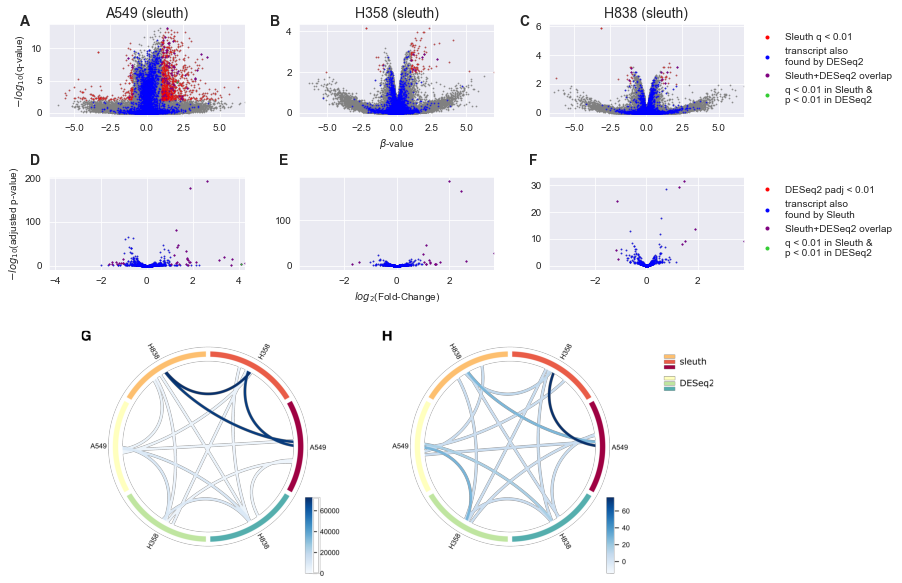

In [192]:
# now we assemble a whole DE figure with the volcano plots and chord charts ^^

# ------------------------------------------------------------------------------------------------------------------------
# Combined Volcano Plot Figure
# ------------------------------------------------------------------------------------------------------------------------

label_offset = (0, 0.1)
legend_xoff = 1.8

fig = plt.figure(figsize = (13, 8.2))

grid = fig.add_gridspec(4, 6)

volcano1 = fig.add_subplot(grid[
                                    0, 0:2
                                ])
volcano2 = fig.add_subplot(grid[
                                    0, 2:4
                                ])
volcano3 = fig.add_subplot(grid[
                                    0, 4:6
                                ])

volcano4 = fig.add_subplot(grid[
                                    1, 0:2
                                ])
volcano5 = fig.add_subplot(grid[
                                    1, 2:4
                                ])
volcano6 = fig.add_subplot(grid[
                                    1, 4:6
                                ])

chords = fig.add_subplot(grid[
                                    2:, :
                                ])

volcanos = [volcano1, volcano2, volcano3, volcano4, volcano5, volcano6]

# ===================================================================================================
#       Sleuth Volcano Plots
# ===================================================================================================
idx = 0
for so, de, name, ax in zip(des_so, des_de, names, volcanos[:3]):
    
    # cross-ref all data and unpack 
    all_data, all_params = crossref(so, de, "so", pthreshold, fcthreshold)
    background, signif_DE, also_other, also_other_DE, both_DE = all_data
    x,y,xlabel,ylabel = all_params

    # main background
    ax.scatter(data = background, x = x, y = y, s = 0.6, c = "gray", alpha = 0.8)
    
    # all transcripts that were also found by DESEQ2
    ax.scatter(data = also_other, x = x, y = y, s = 0.7, c = "blue", alpha = 0.6)

    # all transcripts from sleuth we would classify as significantly differentially expressed
    ax.scatter(data = signif_DE, x = x, y = y, s = 0.7, c = "red", alpha = 0.3)

    # all those DE that are also found by DESEQ2 (just found in general)
    ax.scatter(data = also_other_DE, x = x, y = y, s = 0.7, c = "purple", alpha = 0.9)

    # all those that sleuth and deseq think are DE
    ax.scatter(data = both_DE, x = x, y = y, s = 0.8, c = "limegreen", alpha = 0.9)

    
    ax.set_title(name, fontsize = 14)
    ax.set(xlim = (-max(background[x]),max(background[x])))

    add_subplot_label(idx, ax, "A", fontsize = 14, offset = (-0.05,-0.05))
    idx += 1

volcano1.set(ylabel = "$-log_{10}$(q-value)")
volcano2.set(xlabel = "$\\beta$-value")
volcano3.legend(
handles = [
        Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "red", label = f"Sleuth q < {pthreshold}"),
        Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "blue", label = f"transcript also\nfound by DESeq2"),
        Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "purple", label = f"Sleuth+DESeq2 overlap"),
        Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "limegreen", label = f"q < {pthreshold} in Sleuth &\np < {pthreshold} in DESeq2"),

],
loc = "upper right", bbox_to_anchor = (legend_xoff, 1), facecolor = "white", frameon = False
    
)

# ===================================================================================================
#       DESEQ2 Volcano Plots
# ===================================================================================================
idx = 0
for so, de, name, ax in zip(des_so, des_de, names, volcanos[3:]):
    
    # cross-ref all data and unpack 
    all_data, all_params = crossref(so, de, "de", pthreshold, fcthreshold)
    background, signif_DE, also_other, also_other_DE, both_DE = all_data
    x,y,xlabel,ylabel = all_params

    # main background
    ax.scatter(data = background, x = x, y = y, s = 0.6, c = "gray", alpha = 0.8)
    
    # all transcripts that were also found by DESEQ2
    ax.scatter(data = also_other, x = x, y = y, s = 0.7, c = "blue", alpha = 0.6)

    # all transcripts from sleuth we would classify as significantly differentially expressed
    ax.scatter(data = signif_DE, x = x, y = y, s = 0.7, c = "red", alpha = 0.3)

    # all those DE that are also found by DESEQ2 (just found in general)
    ax.scatter(data = also_other_DE, x = x, y = y, s = 0.7, c = "purple", alpha = 0.9)

    # all those that sleuth and deseq think are DE
    ax.scatter(data = both_DE, x = x, y = y, s = 0.8, c = "limegreen", alpha = 0.9)

    
    # ax.set_title(name, fontsize = 14)
    ax.set(xlim = (-max(background[x]),max(background[x])))

    add_subplot_label(idx, ax, "D", fontsize = 14, offset = label_offset)
    idx += 1

volcano4.set(ylabel = "$-log_{10}$(adjusted p-value)")
volcano5.set(xlabel = "$log_2$(Fold-Change)")
volcano6.legend(
handles = [
        Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "red", label = f"DESeq2 padj < {pthreshold}"),
        Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "blue", label = f"transcript also\nfound by Sleuth"),
        Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "purple", label = f"Sleuth+DESeq2 overlap"),
        Line2D([0], [0], ls = "-", marker = "o", ms = 3, lw = 0, c = "limegreen", label = f"q < {pthreshold} in Sleuth &\np < {pthreshold} in DESeq2"),

],
loc = "upper right", bbox_to_anchor = (legend_xoff, 1), facecolor = "white", frameon = False
    
)
# ===================================================================================================
#       Chord Charts
# ===================================================================================================

chords.imshow(
                plt.imread("../Figures (other)/chords.png")
)
chords.set(facecolor = "white")
chords.grid(None)
chords.set_xticks([])
chords.set_yticks([])


plt.tight_layout(w_pad=2, h_pad = 0.25)
# sns.set_style("ticks")
# sns.despine()
sns.set_style("darkgrid")

plt.savefig(fname = "Plots/volcano_plots_new.jpg", dpi = 1000, bbox_inches = "tight")


## Identification of lncRNAs within the datasets
---

In [185]:
# lncRNAs DE in ALL datasets

lncRNAs = list(a549_so[a549_so["target_id"].str.contains("lncRNA")].query(f"qval < {pthreshold} & abs(b) > {fcthreshold}")["transcript_id"])
diff_in_all = []
for q in lncRNAs:
    _found = True
    for i, name in zip(all_models, names):
        found = i.query(f"transcript_id == '{q}'")
        found = not found.empty
        if not found: 
            _found = False
    if _found:
        diff_in_all.append(q)
diff_in_all 

['ENST00000569981.2',
 'ENST00000562897.1',
 'ENST00000378953.8',
 'ENST00000589796.2']

In [194]:
# lncRNAs DE in ALL datasets

lncRNAs = list(a549_so[a549_so["target_id"].str.contains("lncRNA")].query(f"qval < {pthreshold} & abs(b) > {fcthreshold}")["transcript_id"])
diff_in_sleuth = []
for q in lncRNAs:
    _found = True
    for i, name in zip(des_so, names):
        found = i.query(f"transcript_id == '{q}'")
        found = not found.empty
        if not found: 
            _found = False
    if _found:
        diff_in_sleuth.append(q)
diff_in_sleuth 

['ENST00000606034.1',
 'ENST00000642451.1',
 'ENST00000663760.2',
 'ENST00000518481.2',
 'ENST00000587961.1',
 'ENST00000655830.2',
 'ENST00000569981.2',
 'ENST00000562897.1',
 'ENST00000378953.8',
 'ENST00000411630.7',
 'ENST00000512200.1',
 'ENST00000578968.6',
 'ENST00000653192.1',
 'ENST00000545631.2',
 'ENST00000533506.5',
 'ENST00000608142.1',
 'ENST00000676262.1',
 'ENST00000589796.2',
 'ENST00000337752.6',
 'ENST00000609178.1',
 'ENST00000407797.6',
 'ENST00000415067.2',
 'ENST00000413077.2',
 'ENST00000568654.2',
 'ENST00000690327.1',
 'ENST00000526453.1',
 'ENST00000561107.5',
 'ENST00000653384.1',
 'ENST00000663202.2',
 'ENST00000663493.1',
 'ENST00000689029.1',
 'ENST00000685735.1',
 'ENST00000543072.2',
 'ENST00000689375.1',
 'ENST00000613452.1',
 'ENST00000659690.1']

In [203]:
# now we query for DE transcripts where cell line matching is now irrelevant

both_DE_no_cell_line = []
for so in des_so:
    DE = list(so.query(f"qval < {pthreshold} & abs(b) > {fcthreshold}")["transcript_id"])
    for q in DE:
        _found = True
        for i, name in zip(des_de, names):
            found = i.query(f"transcript_id == '{q}'")
            found = not found.empty
            if not found: 
                _found = False
        if _found:
            both_DE_no_cell_line.append(q)
 
for de in des_de:
    DE = list(de.query(f"padj < {pthreshold} & abs(log2FoldChange) > {fcthreshold}")["transcript_id"])
    for q in DE:
        _found = True
        for i, name in zip(des_so, names):
            found = i.query(f"transcript_id == '{q}'")
            found = not found.empty
            if not found: 
                _found = False
        if _found:
            if q not in both_DE_no_cell_line:
                both_DE_no_cell_line.append(q)
                print(so.query(f"transcript_id == '{q}'")[["transcript_id", "ens_gene"]])
 
both_DE_no_cell_line

           transcript_id ens_gene
27469  ENST00000559553.1      NaN
           transcript_id            ens_gene
42443  ENST00000371837.5  ENSG00000107798.18
           transcript_id ens_gene
78427  ENST00000626572.2      NaN
          transcript_id            ens_gene
1796  ENST00000604604.1  ENSG00000133131.15
           transcript_id           ens_gene
78974  ENST00000637974.1  ENSG00000110395.7
           transcript_id            ens_gene
11505  ENST00000540200.6  ENSG00000004142.12
          transcript_id           ens_gene
9268  ENST00000267202.7  ENSG00000139722.7
          transcript_id ens_gene
5097  ENST00000578774.1      NaN
           transcript_id           ens_gene
29322  ENST00000588097.5  ENSG00000267750.6
           transcript_id           ens_gene
35919  ENST00000570311.1  ENSG00000263142.5
         transcript_id           ens_gene
536  ENST00000682254.1  ENSG00000180720.8
           transcript_id           ens_gene
22572  ENST00000538010.5  ENSG00000110987.9
        

['ENST00000340857.4',
 'ENST00000357085.5',
 'ENST00000245907.11',
 'ENST00000380698.5',
 'ENST00000378700.8',
 'ENST00000302754.6',
 'ENST00000275767.3',
 'ENST00000280612.9',
 'ENST00000275230.6',
 'ENST00000379416.4',
 'ENST00000302764.9',
 'ENST00000056233.4',
 'ENST00000494864.1',
 'ENST00000339364.10',
 'ENST00000267889.5',
 'ENST00000397747.5',
 'ENST00000296452.5',
 'ENST00000200652.4',
 'ENST00000409190.8',
 'ENST00000257836.4',
 'ENST00000569981.2',
 'ENST00000562897.1',
 'ENST00000378953.8',
 'ENST00000320955.8',
 'ENST00000216115.3',
 'ENST00000511601.6',
 'ENST00000589796.2',
 'ENST00000599564.5',
 'ENST00000440575.6',
 'ENST00000389623.11',
 'ENST00000343898.9',
 'ENST00000588552.5',
 'ENST00000559989.1',
 'ENST00000450361.2',
 'ENST00000219334.10',
 'ENST00000273067.5',
 'ENST00000623593.1',
 'ENST00000267889.5',
 'ENST00000332290.3',
 'ENST00000280612.9',
 'ENST00000296238.4',
 'ENST00000302764.9',
 'ENST00000267889.5',
 'ENST00000559553.1',
 'ENST00000371837.5',
 'ENST

In [197]:
for i in both_DE_no_cell_line: print(i)

ENST00000340857.4
ENST00000357085.5
ENST00000245907.11
ENST00000380698.5
ENST00000378700.8
ENST00000302754.6
ENST00000275767.3
ENST00000280612.9
ENST00000275230.6
ENST00000379416.4
ENST00000302764.9
ENST00000056233.4
ENST00000494864.1
ENST00000339364.10
ENST00000267889.5
ENST00000397747.5
ENST00000296452.5
ENST00000200652.4
ENST00000409190.8
ENST00000257836.4
ENST00000569981.2
ENST00000562897.1
ENST00000378953.8
ENST00000320955.8
ENST00000216115.3
ENST00000511601.6
ENST00000589796.2
ENST00000599564.5
ENST00000440575.6
ENST00000389623.11
ENST00000343898.9
ENST00000588552.5
ENST00000559989.1
ENST00000450361.2
ENST00000219334.10
ENST00000273067.5
ENST00000623593.1
ENST00000267889.5
ENST00000332290.3
ENST00000280612.9
ENST00000296238.4
ENST00000302764.9
ENST00000267889.5
ENST00000559553.1
ENST00000371837.5
ENST00000626572.2
ENST00000604604.1
ENST00000637974.1
ENST00000540200.6
ENST00000267202.7
ENST00000578774.1
ENST00000588097.5
ENST00000570311.1
ENST00000682254.1
ENST00000538010.5
ENST00

In [207]:
# now we query for DE transcripts where cell line matching is now irrelevant

both_DE_no_cell_line = []
for so in des_so:
    DE = list(so.query(f"qval < {pthreshold} & abs(b) > {fcthreshold}")["transcript_id"])
    for q in DE:
        _found = False
        for i, name in zip(des_de, names):
            found = i.query(f"transcript_id == '{q}' & padj < {pthreshold} & abs(log2FoldChange) > {fcthreshold}")
            found = not found.empty
            if found: 
                _found = True
        if _found:
            both_DE_no_cell_line.append(q)
 
for de in des_de:
    DE = list(de.query(f"padj < {pthreshold} & abs(log2FoldChange) > {fcthreshold}")["transcript_id"])
    for q in DE:
        _found = False
        for i, name in zip(des_so, names):
            found = i.query(f"transcript_id == '{q}' & qval < {pthreshold} & abs(b) > {fcthreshold}")
            found = not found.empty
            if found: 
                _found = True
        if _found:
            if q not in both_DE_no_cell_line:
                both_DE_no_cell_line.append(q)
                print(so.query(f"transcript_id == '{q}'")[["transcript_id", "ens_gene"]])
 
both_DE_no_cell_line

['ENST00000612722.1']